In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

## 1 数据预处理

In [2]:
# 加载数据
data_path = "../data/luggage_compartment_door.txt"
df = pd.read_csv(data_path, sep='\t', encoding='utf-8')

In [3]:
df = df.rename(columns={'物料编码': 'part_id', '物料描述': 'part_name', 
                        '订货数': 'order_num', '缺件数': 'out_of_stock_num', 
                        '受理数': 'delivery_num', '审核日期': 'date', '审核时间': 'time'})

In [4]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df.set_index('date', inplace=True)

In [5]:
df['part_id'] = df['part_id'].astype('str')

In [6]:
df_week = df.resample('W').sum()

In [7]:
df_month = df.resample('M').sum()

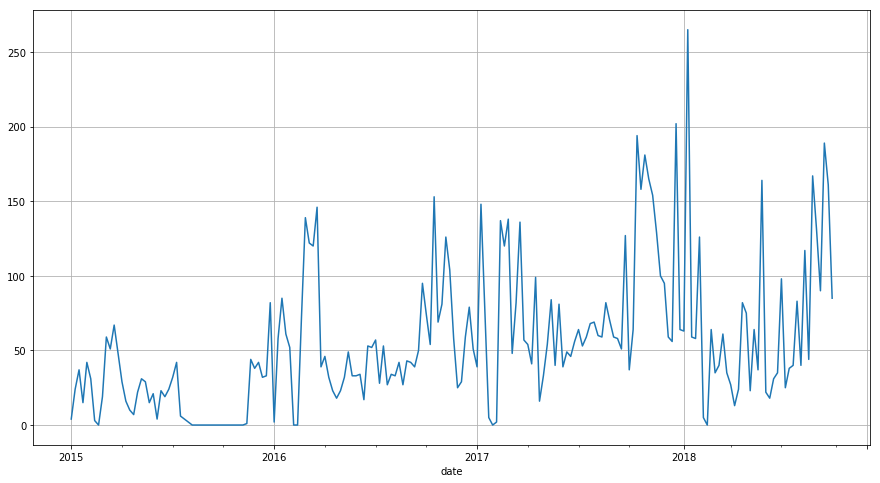

In [8]:
df_week.order_num.plot(figsize=(15, 8), grid=True)

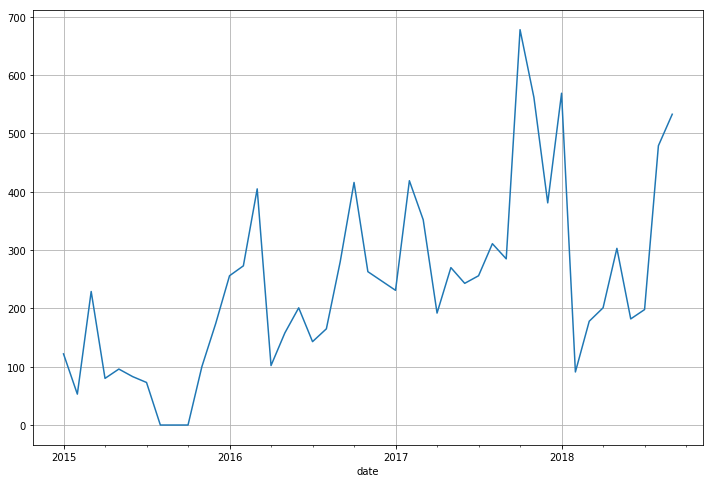

In [9]:
df_month.order_num.plot(figsize=(12, 8), grid=True)